# Digit Recognizer Using Keras, Neural Network

In [2]:

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, SGD, Adagrad, Adadelta, Adam

import pandas as pd

In [7]:
##Reading the Input Train dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [8]:
##Data Observation
print(train.head())
print(train.shape)

print(test.head())
print(test.shape)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [10]:
##Splitting the Train dataset into Train and Validate set for predicting the model accuracy
from sklearn.model_selection import train_test_split

In [13]:
train_set, test_set = train_test_split(train, test_size=0.20,random_state=42)
X_train_set = train_set.drop(['label'], axis=1) #Dropping 'label', the predicted variable 
y_train_set = train_set['label'] # keeping 'label', the predicted variable 

X_test_set = test_set.drop(['label'], axis=1)
y_test_set = test_set['label']

In [25]:
train_image_array = X_train_set.as_matrix()
train_label_array = y_train_set.as_matrix()

test_image_array = X_test_set.as_matrix()
test_label_array = y_test_set.as_matrix()

In [26]:
train_images = train_image_array.reshape(33600, 784)
test_images = test_image_array.reshape(8400, 784)
train_images = train_images.astype('float32')
test_imagess = test_images.astype('float32')
train_images = train_images/255
test_images = test_images/255
print(train_images.shape)

(33600, 784)


In [27]:
train_labels = keras.utils.to_categorical(train_label_array, 10)
test_labels = keras.utils.to_categorical(test_label_array, 10)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


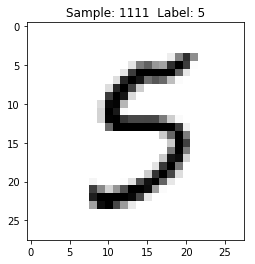

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


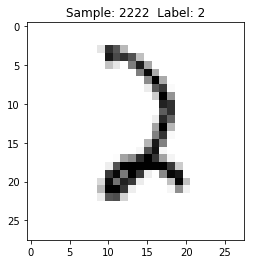

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


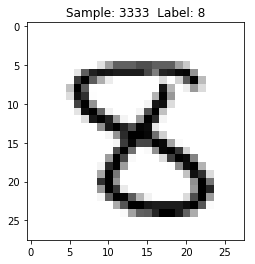

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(train_labels[num]) #df_train_label_array
    #Print the label converted back to a number
    label = train_labels[num].argmax(axis=0) #df_train_label_array
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    #plt.subplot(4,4,i)
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1111) #the 1111st image in the Training set
display_sample(2222) #the 2222nd image in the Training set
display_sample(3333) #the 3333rd image in the Training set

In [29]:
##Neural Network

In [30]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) 
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [36]:
history = model.fit(train_images, train_labels,
                    batch_size=50, 
                    epochs=50, 
                    verbose=2,
                    validation_data=(test_images, test_labels))

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
 - 22s - loss: 0.0570 - acc: 0.9834 - val_loss: 0.0812 - val_acc: 0.9769
Epoch 2/50
 - 21s - loss: 0.0563 - acc: 0.9827 - val_loss: 0.0967 - val_acc: 0.9750
Epoch 3/50
 - 22s - loss: 0.0615 - acc: 0.9809 - val_loss: 0.0896 - val_acc: 0.9775
Epoch 4/50
 - 22s - loss: 0.0524 - acc: 0.9843 - val_loss: 0.0949 - val_acc: 0.9761
Epoch 5/50
 - 22s - loss: 0.0528 - acc: 0.9835 - val_loss: 0.0931 - val_acc: 0.9786
Epoch 6/50
 - 23s - loss: 0.0504 - acc: 0.9840 - val_loss: 0.0897 - val_acc: 0.9787
Epoch 7/50
 - 22s - loss: 0.0553 - acc: 0.9839 - val_loss: 0.0908 - val_acc: 0.9771
Epoch 8/50
 - 22s - loss: 0.0472 - acc: 0.9855 - val_loss: 0.0906 - val_acc: 0.9786
Epoch 9/50
 - 21s - loss: 0.0546 - acc: 0.9847 - val_loss: 0.0946 - val_acc: 0.9782
Epoch 10/50
 - 21s - loss: 0.0525 - acc: 0.9848 - val_loss: 0.0978 - val_acc: 0.9793
Epoch 11/50
 - 24s - loss: 0.0539 - acc: 0.9847 - val_loss: 0.1001 - val_acc: 0.9774
Epoch 12/50
 - 25s - loss

In [34]:
## Epochs - 20
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07945407435641669
Test accuracy: 0.9798809523809524


In [35]:
predictions = model.predict_classes(test, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("DR.csv", index=False, header=True)

In [37]:
## Epochs 50
## Epochs - 20
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11830423217389174
Test accuracy: 0.98


In [38]:
predictions = model.predict_classes(test, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("DR1.csv", index=False, header=True)